In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

    100% |████████████████████████████████| 86.3MB 189kB/s ta 0:00:014    29% |█████████▍                      | 25.5MB 33kB/s eta 0:30:09    46% |███████████████                 | 40.2MB 444kB/s eta 0:01:44    57% |██████████████████▌             | 50.0MB 131kB/s eta 0:04:36    68% |█████████████████████▉          | 58.9MB 131kB/s eta 0:03:29
    100% |████████████████████████████████| 1.3MB 668kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d1/4f/950dfae467b384fc96bc6469de25d832534f6b4441033c39f914efd13418/astor-0.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b8/83/755bd5324777875e9dff19c2e59daec837d0378c09196634524a3d7269ac/opt_einsum-3.1.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/d3/9e/a48cd34dd7b672ffc227b566f7d16d63c62c58b542d54efa45848c395dd4/tensorboard-2.0.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fc/08/8b927337b7019c374719145d1dceba21a8bb909b93b1ad6f8fb7d22c1ca1/tenso

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
#from keras.optimizers import adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
#import numpy as np
#import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('Musique/spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


Text(0.5, 1.0, 'Number of ham and spam messages')

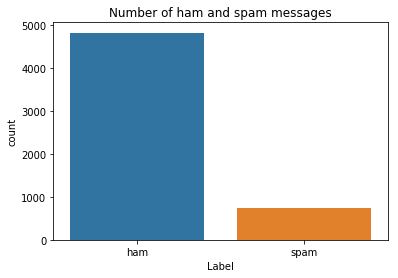

In [21]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [22]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [24]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [25]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [26]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [27]:
 history =model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

/home/soumana/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/soumana/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 8s 2ms/step - loss: 0.3060 - accuracy: 0.8891 - val_loss: 0.1472 - val_accuracy: 0.9726
Epoch 2/10
3788/3788 [==============================] - 6s 2ms/step - loss: 0.0788 - accuracy: 0.9802 - val_loss: 0.0606 - val_accuracy: 0.9821
Epoch 3/10
3788/3788 [==============================] - 6s 2ms/step - loss: 0.0437 - accuracy: 0.9876 - val_loss: 0.0598 - val_accuracy: 0.9852
Epoch 4/10
3788/3788 [==============================] - 6s 2ms/step - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.0496 - val_accuracy: 0.9863
Epoch 5/10
3788/3788 [==============================] - 6s 2ms/step - loss: 0.0286 - accuracy: 0.9916 - val_loss: 0.0597 - val_accuracy: 0.9863


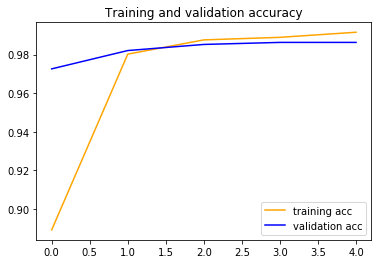

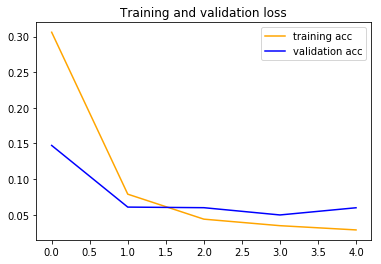

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [31]:
accr = model.evaluate(test_sequences_matrix,Y_test)

836/836 [==============================] - 1s 649us/step


In [32]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.059
  Accuracy: 0.983
